In [26]:
import matplotlib.pyplot as plt
from evaluator import Evaluator
from generator import Generator
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from models import NIC
from data_manager import DataManager
from keras.models import load_model

%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)
plt.rcParams['image.interpolation'] = 'nearest'

# Data preprocessing

In [2]:
num_epochs = 500
batch_size = 256
root_path = '../datasets/IAPR_2012/'
captions_filename = root_path + 'IAPR_2012_captions.txt'
data_manager = DataManager(data_filename=captions_filename,
                            max_caption_length=26,
                            word_frequency_threshold=2,
                            extract_image_features=False,
                            cnn_extractor='inception',
                            image_directory=root_path + 'iaprtc12/',
                            split_data=True,
                            dump_path=root_path + 'preprocessed_data/')

In [3]:
data_manager.preprocess()
print(data_manager.captions[0])
print(data_manager.word_frequencies[0:20])

Loading data ...
Loaded 19625 captions
Removing captions longer than 26 ...
Number of files removed: 2235
Current number of files: 17390
Removing words with a frequency less than 2 ...
Number of words removed: 1900
Current number of words: 2091
['eight', 'tourists', 'are', 'posing', 'in', 'front', 'of', 'a', 'grey', 'rock', 'on', 'a', 'steep', 'slope', 'with', 'high', 'grass']
[['a' '35648']
 ['in' '13066']
 ['and' '12566']
 ['with' '12475']
 ['the' '10055']
 ['on' '8276']
 ['of' '7598']
 ['brown' '5746']
 ['are' '4962']
 ['grey' '4586']
 ['is' '3647']
 ['standing' '3147']
 ['white' '3086']
 ['green' '3085']
 ['foreground' '2972']
 ['at' '2468']
 ['front' '2233']
 ['two' '2231']
 ['blue' '2218']
 ['black' '2209']]


In [4]:
preprocessed_data_path = root_path + 'preprocessed_data/'
generator = Generator(data_path=preprocessed_data_path,
                      batch_size=batch_size)

num_training_samples =  generator.training_dataset.shape[0]
num_validation_samples = generator.validation_dataset.shape[0]
print('Number of training samples:', num_training_samples)
print('Number of validation samples:', num_validation_samples)

Loading training dataset...
Loading validation dataset...
Loading vocabulary...
Number of training samples: 11129
Number of validation samples: 2783


# NIC model specifications

In [5]:
model = NIC(max_token_length=generator.MAX_TOKEN_LENGTH,
            vocabulary_size=generator.VOCABULARY_SIZE,
            rnn='gru',
            num_image_features=generator.IMG_FEATS,
            hidden_size=256,
            embedding_size=256)

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

print(model.summary())
print('Number of parameters:', model.count_params())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
text (InputLayer)                (None, 28, 2094)      0                                            
____________________________________________________________________________________________________
text_mask (Masking)              (None, 28, 2094)      0           text[0][0]                       
____________________________________________________________________________________________________
image (InputLayer)               (None, 28, 2048)      0                                            
____________________________________________________________________________________________________
time_distributed_1 (TimeDistribu (None, 28, 256)       536320      text_mask[0][0]                  
___________________________________________________________________________________________

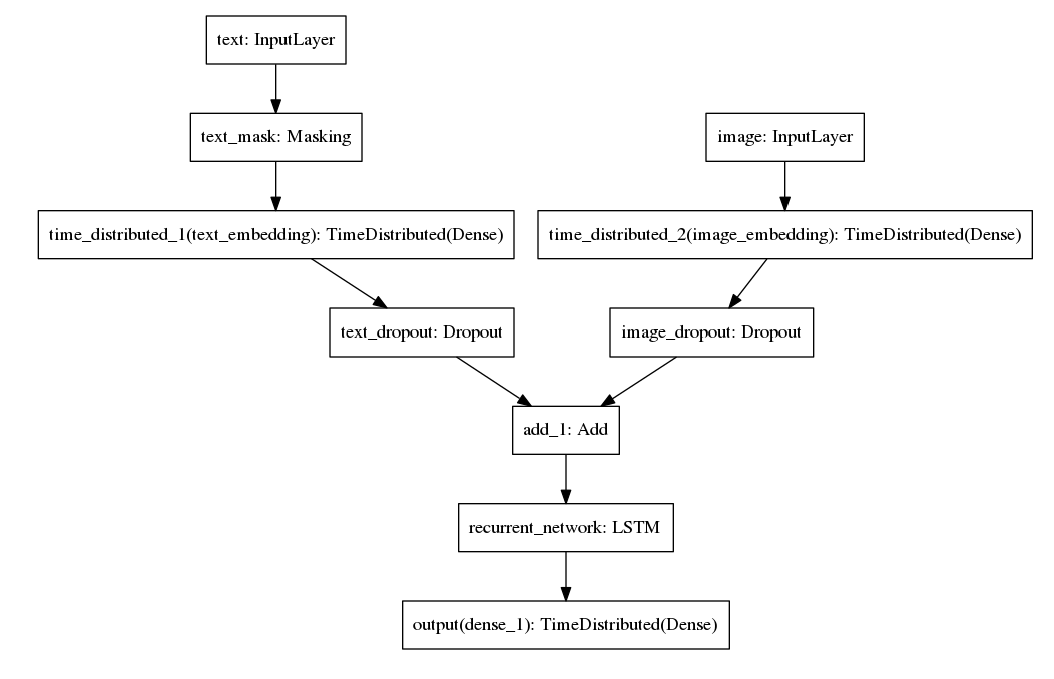

In [24]:
image = plt.imread('../images/NIC.png')
plt.imshow(image)
plt.axis('off')
plt.show()

# Testing model

<S>
tourists
are
sitting
on
a
grey
roof
in
front
of
a
grey
wall
<E>


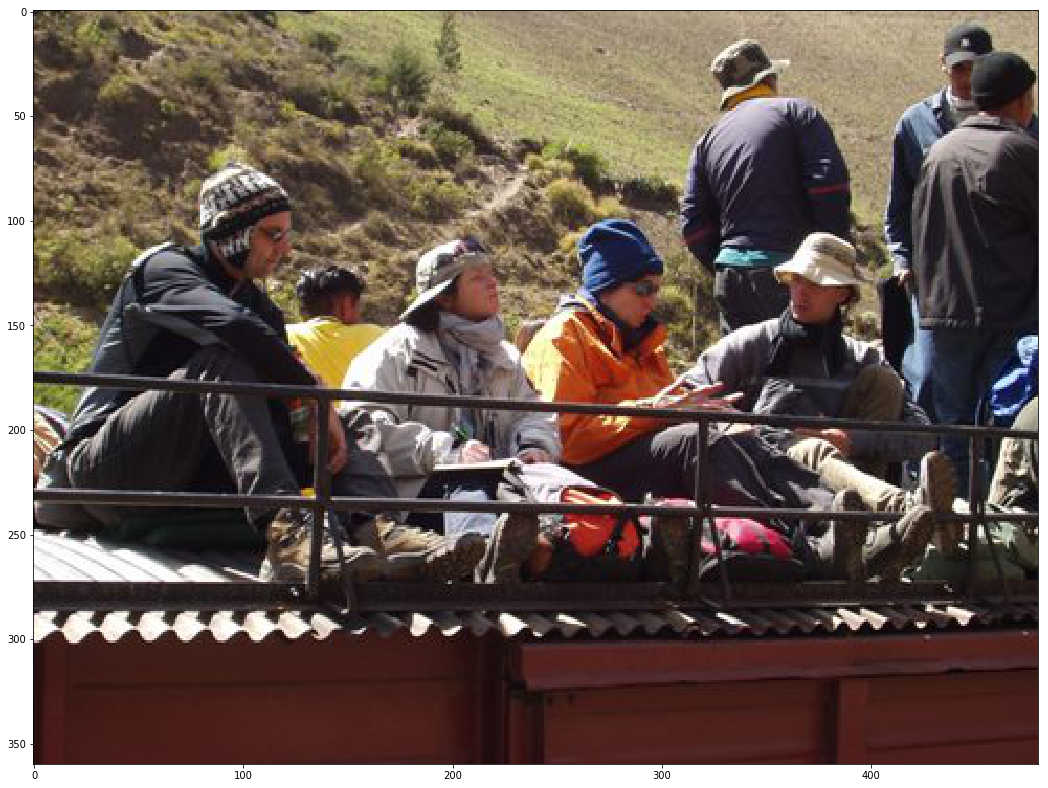

In [69]:
root_path = '../datasets/IAPR_2012/'
data_path = root_path + 'preprocessed_data/'
images_path = root_path + 'iaprtc12/'
model_filename = '../trained_models/IAPR_2012/iapr_weights.54-1.96.hdf5'
model = load_model(model_filename)
evaluator = Evaluator(model, data_path, images_path)
evaluator.display_caption()